In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dailyActivity_merged.csv')
df.sample(5)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
755,7086361926,4/30/2016,14560,9.41,9.41,0.0,3.12,1.04,5.24,0.0,42,17,308,584,2995
458,4445114986,4/27/2016,7243,5.03,5.03,0.0,2.62,0.03,2.38,0.0,32,1,194,839,2361
251,2347167796,4/16/2016,22244,15.08,15.08,0.0,5.45,4.10,5.53,0.0,66,72,268,968,2670
759,7086361926,5/4/2016,10988,8.31,8.31,0.0,5.28,0.12,2.90,0.0,45,12,135,843,2655
383,4319703577,4/14/2016,10210,6.88,6.88,0.0,0.11,0.33,6.44,0.0,1,9,339,589,2302


In [3]:
df.shape # jumlah data sebelum cleansing

(940, 15)

# Data Cleansing

## Handle Missing Values

In [4]:
df.isnull().sum() # no null data

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

## Handle duplicated data

In [5]:
df.duplicated().sum() # no duplicated data

0

## Handle outliers

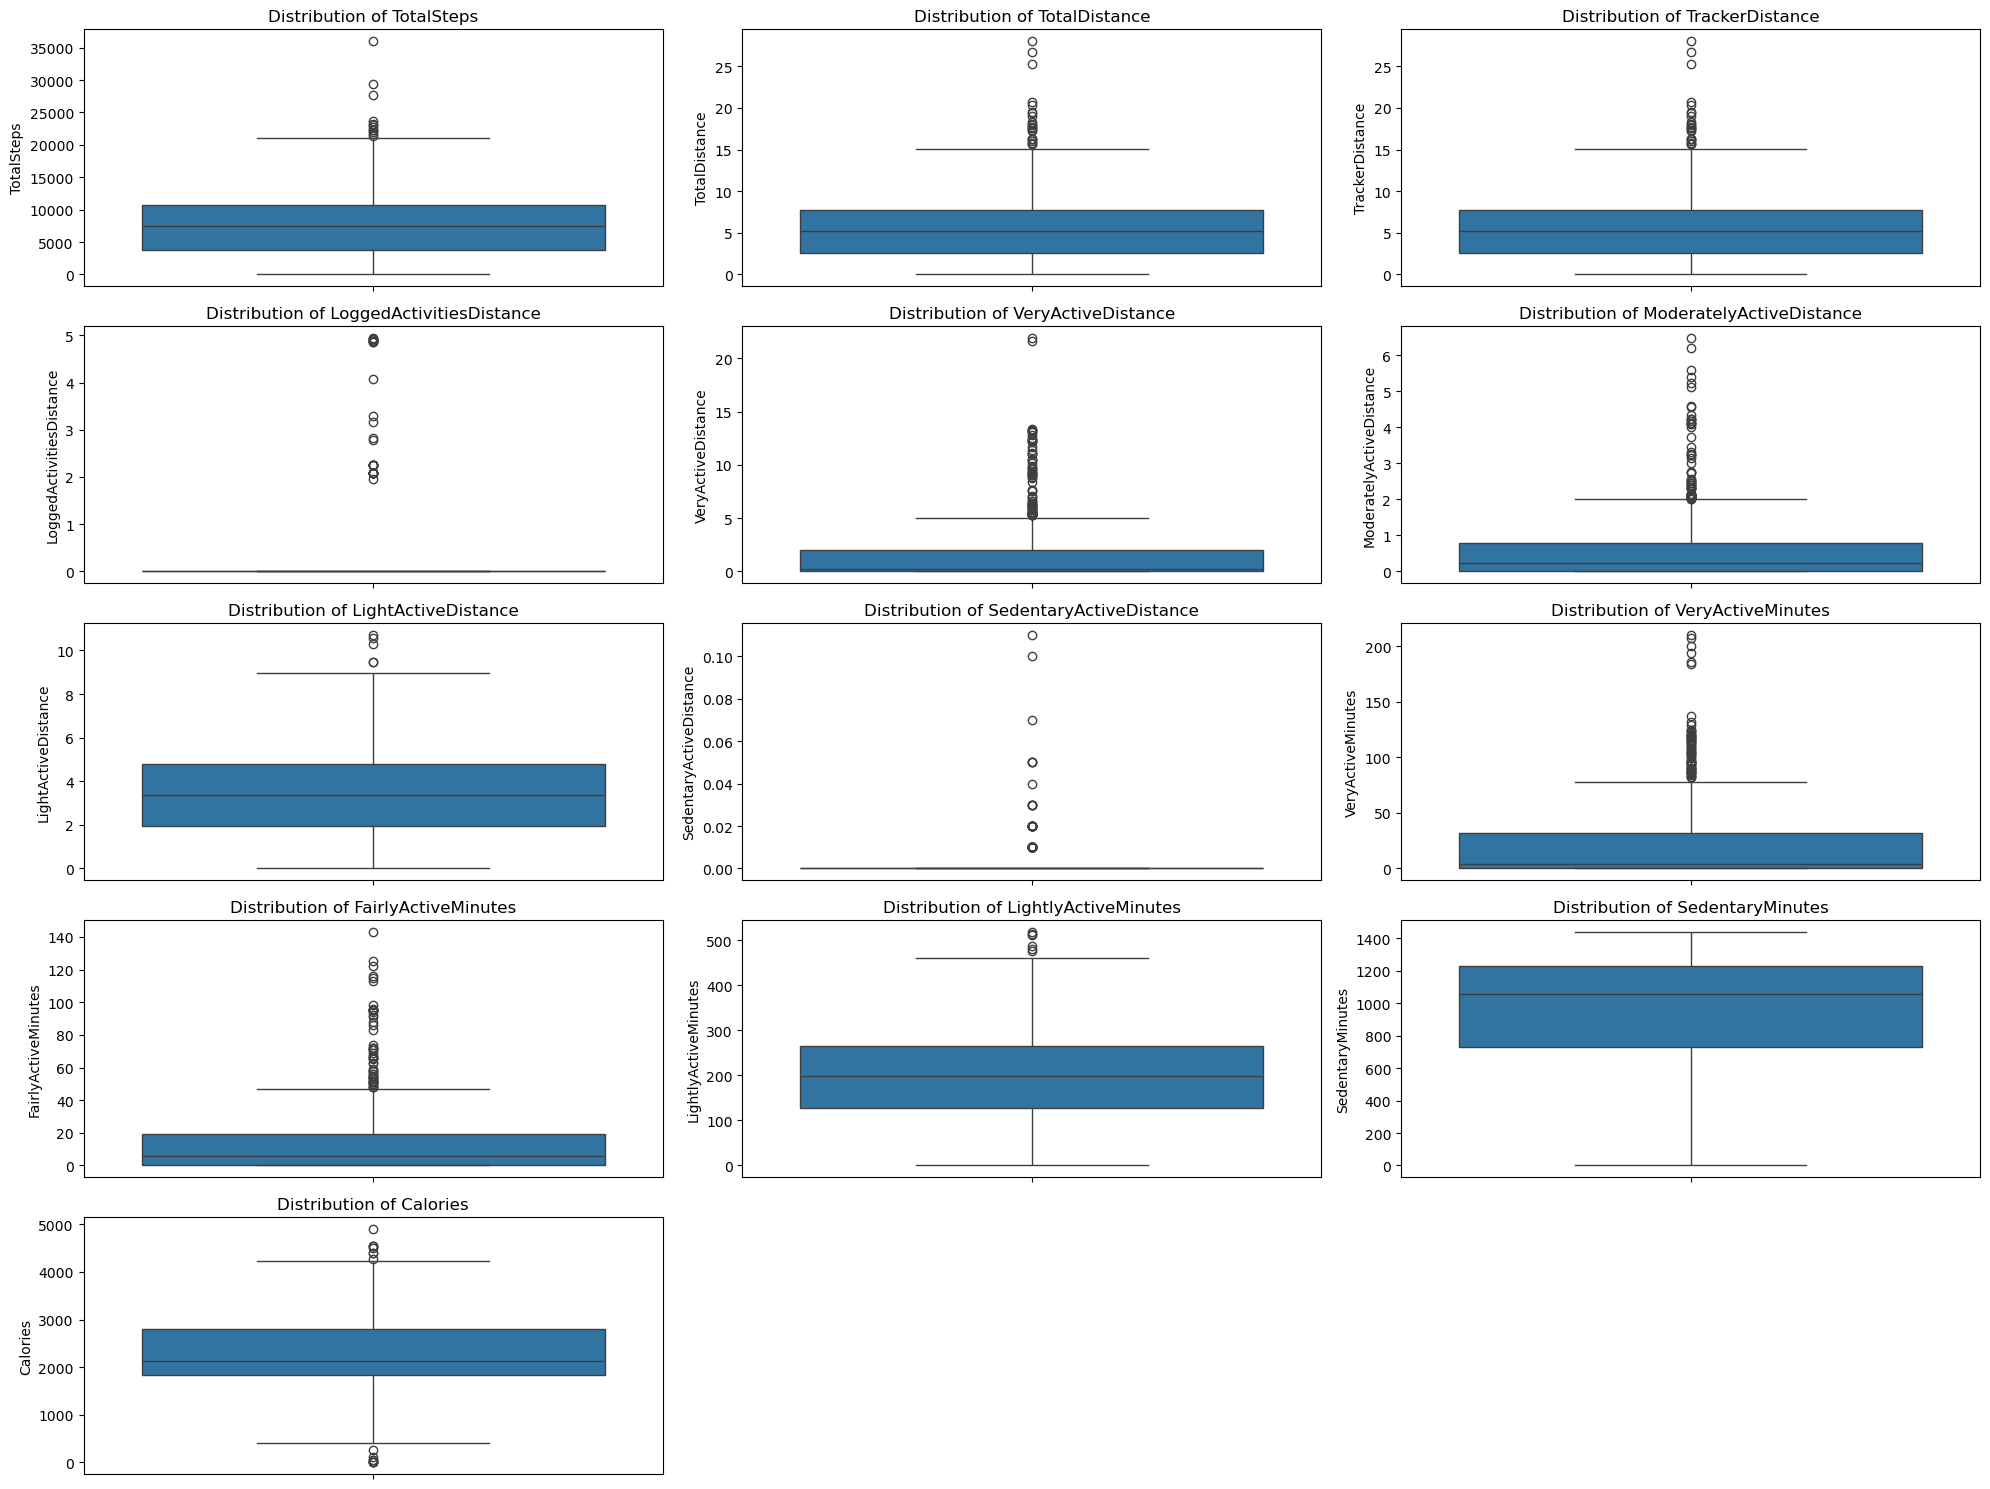

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
numerics = [
    'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 
    'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 
    'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 
    'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'
]

# Plot distribusi setiap kolom untuk melihat adanya outlier
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerics, 1):
    plt.subplot(5, 3, i)  # Menampilkan 5 baris dan 3 kolom plot
    sns.boxplot(df[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [7]:
# Handling outliers dengan z-score
from scipy import stats
from scipy.stats import zscore
import numpy as np

dfo = df.copy() # dataset setelah z-score

for num in numerics:
    z_scores = np.abs(stats.zscore(dfo[num]))
    dfo= dfo[(z_scores <= 3)]

print(f'Dataset sebelum handling outliers {df.shape}')
print(f'Dataset setelah handling outliers{dfo.shape}')


Dataset sebelum handling outliers (940, 15)
Dataset setelah handling outliers(776, 15)


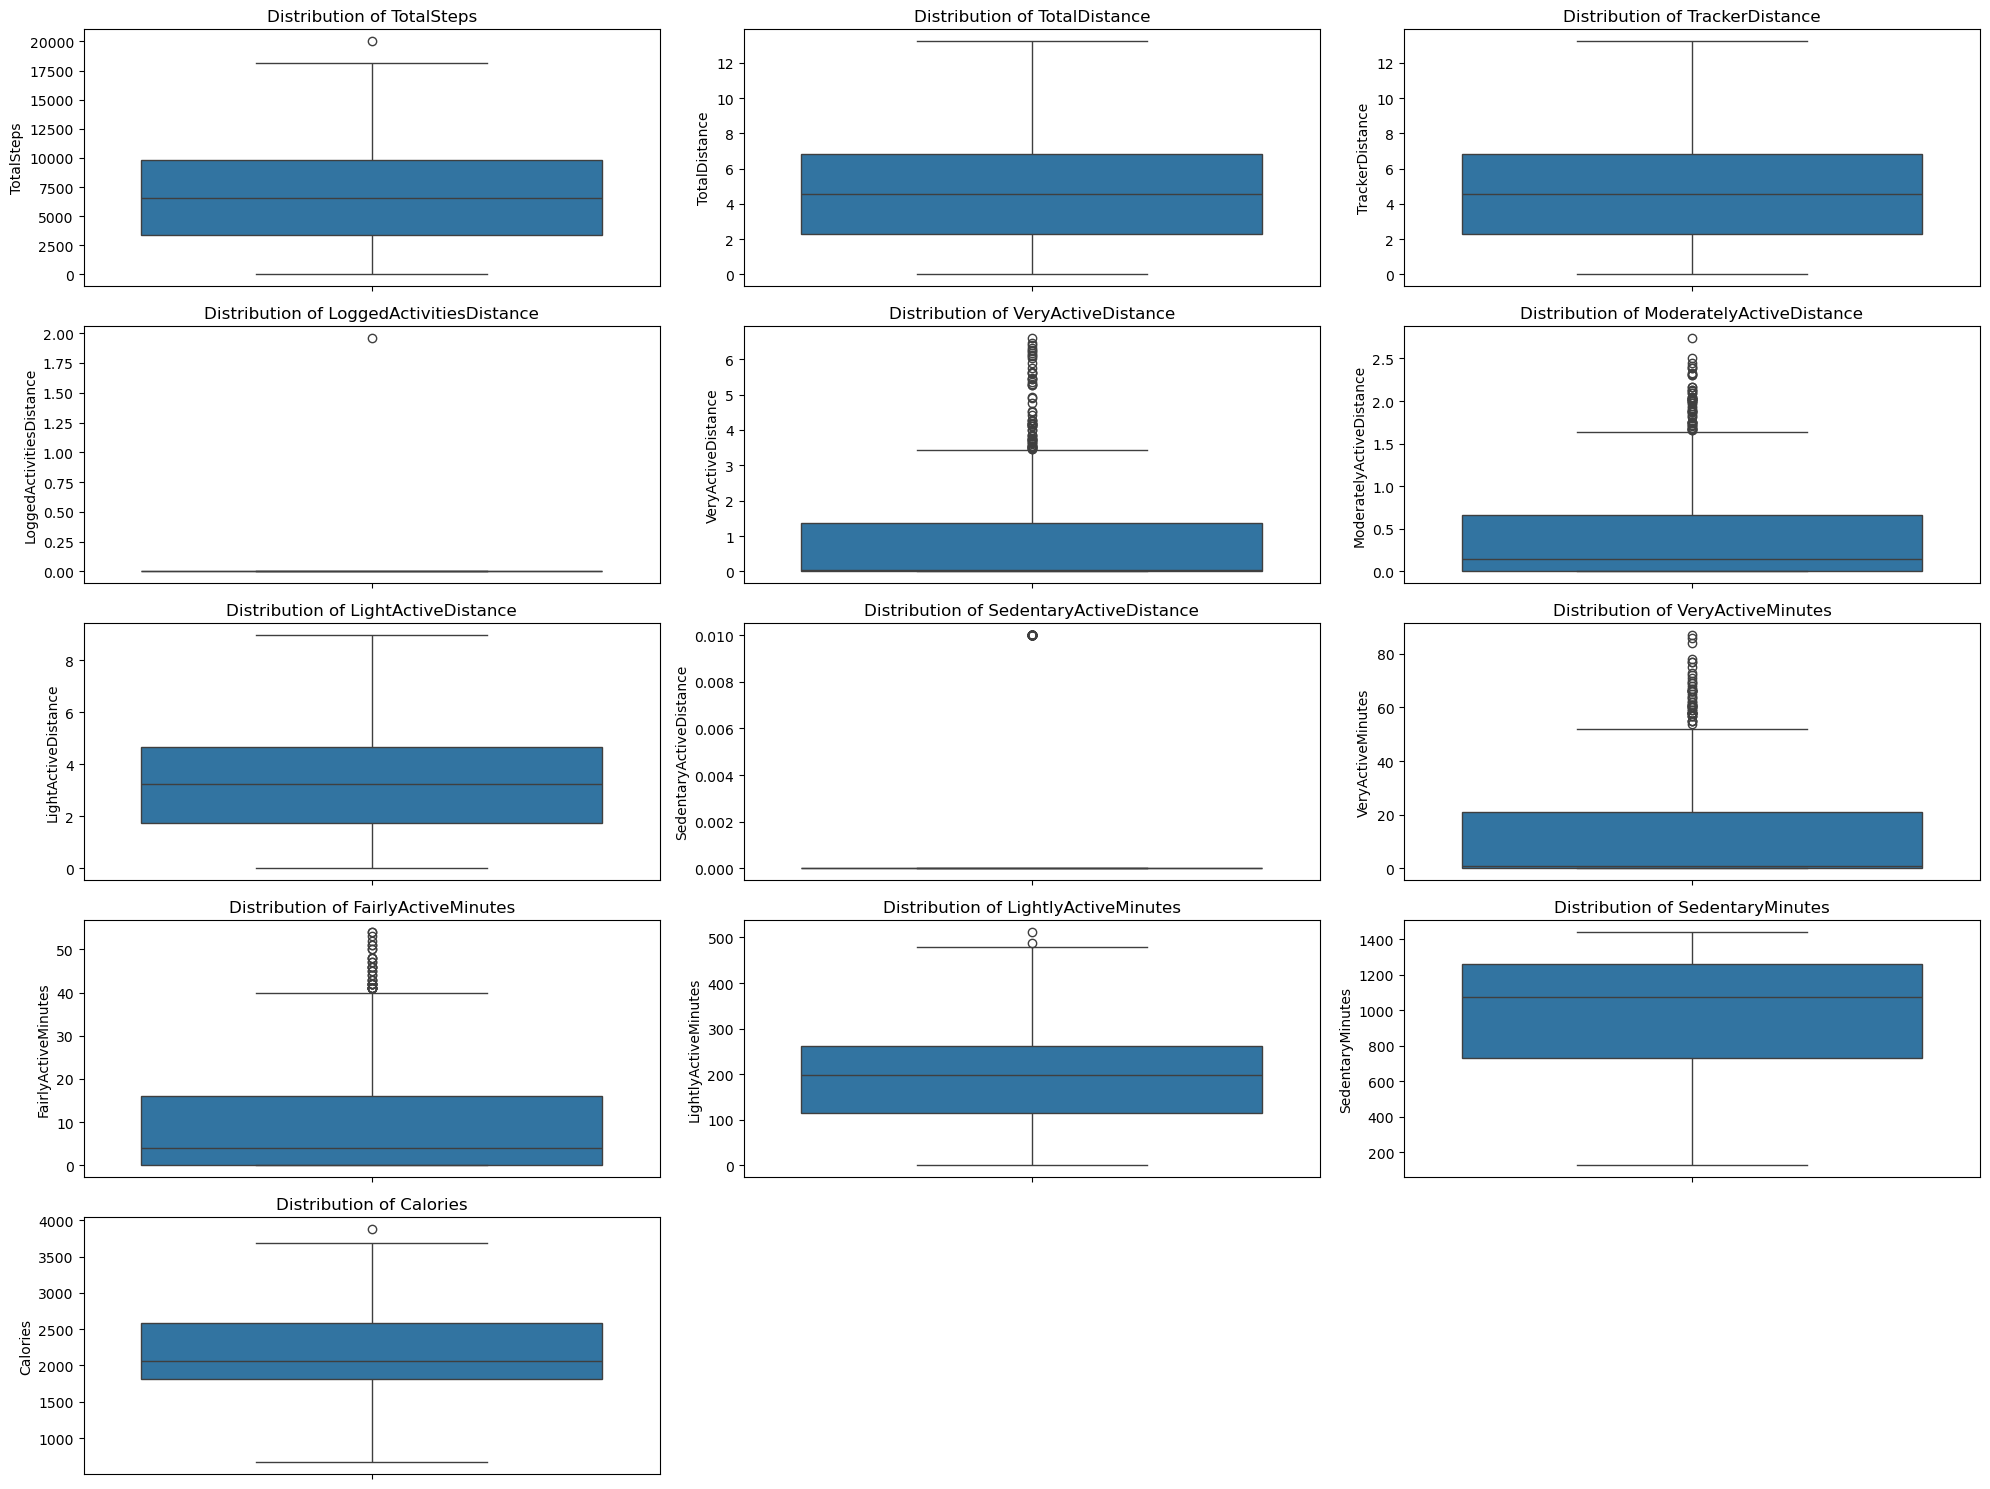

In [8]:
# boxplot setelah z-score
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerics, 1):
    plt.subplot(5, 3, i)  # Menampilkan 5 baris dan 3 kolom plot
    sns.boxplot(dfo[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

## Feature transformation

In [9]:
# Standarisasi karena akan menggunakan regression model dan lebih robust terhadap outliers
from sklearn.preprocessing import StandardScaler

for num in numerics:
    dfo[num] = StandardScaler().fit_transform(dfo[num].values.reshape(len(dfo),1))
dfo.describe()


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,776.000000,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02
mean,4.576117e+09,-6.409535e-17,-3.662591e-17,-3.662591e-17,2.060208e-17,-1.281907e-16,2.746944e-17,5.493887e-17,-3.662591e-17,0.000000,-4.578239e-17,2.746944e-17,1.556601e-16,-3.479462e-16
std,2.352920e+09,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00,1.000645,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00
min,1.503960e+09,-1.578282e+00,-1.565646e+00,-1.565646e+00,-3.592106e-02,-6.360188e-01,-7.170667e-01,-1.586859e+00,-2.539131e-01,-0.674532,-7.570379e-01,-1.697611e+00,-2.921018e+00,-2.799729e+00
25%,2.026352e+09,-7.630132e-01,-7.801325e-01,-7.801325e-01,-3.592106e-02,-6.360188e-01,-7.170667e-01,-7.121348e-01,-2.539131e-01,-0.674532,-7.570379e-01,-6.576599e-01,-9.111388e-01,-6.732274e-01
50%,4.388162e+09,-1.719733e-03,-9.921004e-03,-9.921004e-03,-3.592106e-02,-5.976313e-01,-4.713476e-01,2.074217e-02,-2.539131e-01,-0.623265,-4.537929e-01,9.029610e-02,2.196252e-01,-2.034512e-01
75%,6.775889e+09,7.821235e-01,7.611405e-01,7.611405e-01,-3.592106e-02,3.219219e-01,4.056158e-01,7.436649e-01,-2.539131e-01,0.402076,4.559422e-01,6.585629e-01,8.280524e-01,7.620454e-01
max,8.877689e+09,3.226971e+00,2.936605e+00,2.936605e+00,2.783882e+01,3.970472e+00,3.926178e+00,2.877594e+00,3.938355e+00,3.785701,3.336770e+00,2.902431e+00,1.433168e+00,3.156329e+00


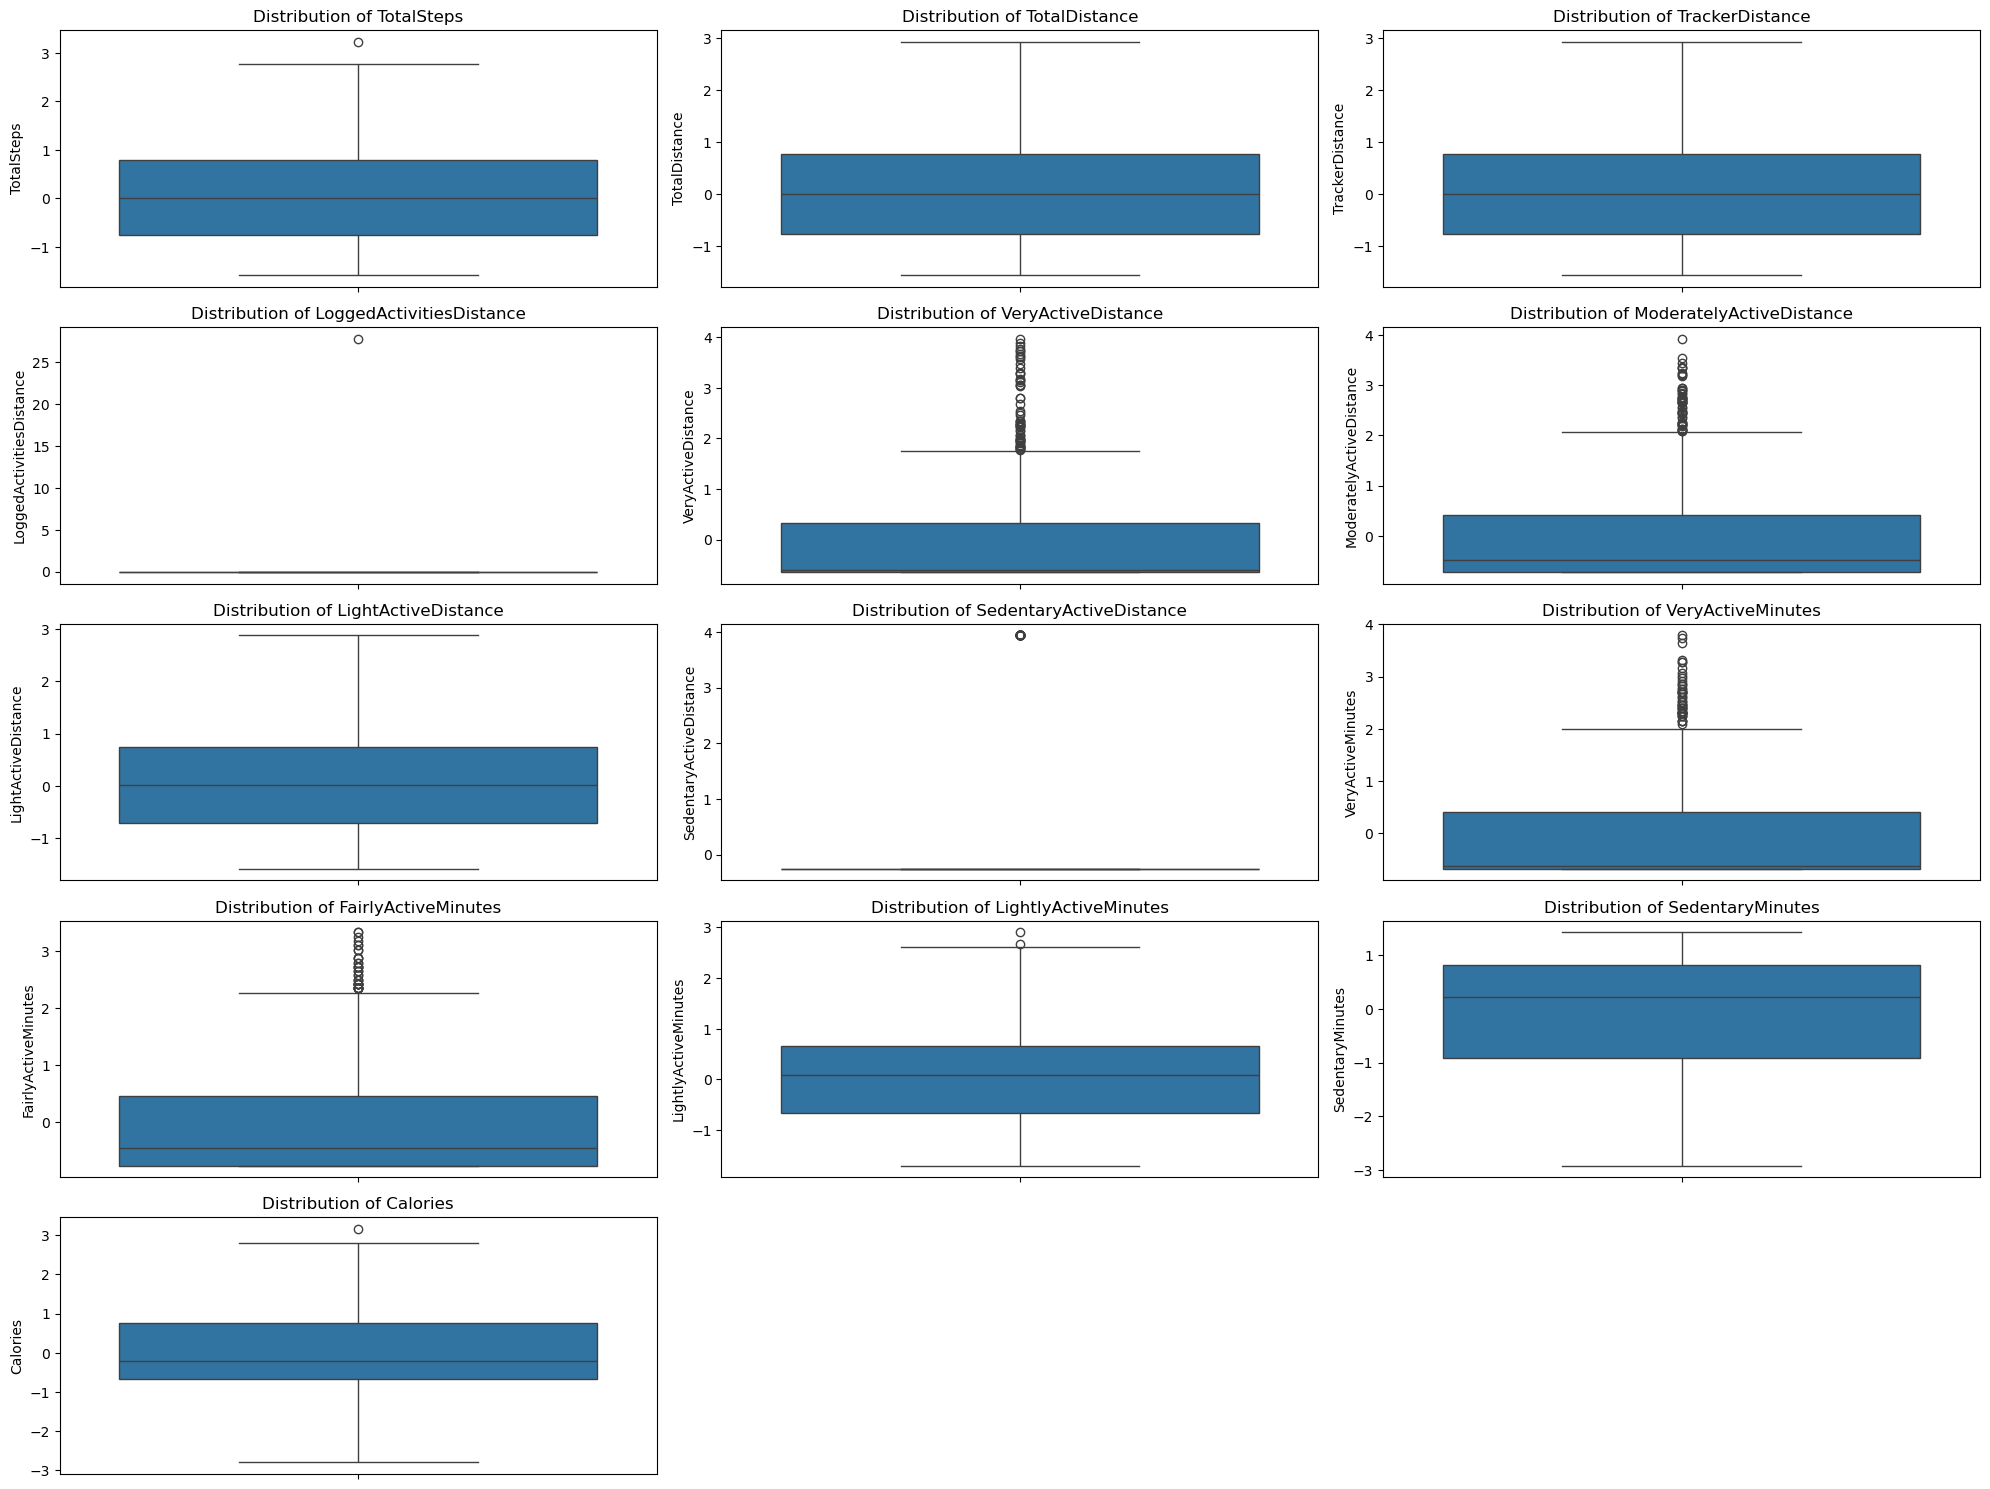

In [10]:
# Boxplot setelah standardization

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerics, 1):
    plt.subplot(5, 3, i)  # Menampilkan 5 baris dan 3 kolom plot
    sns.boxplot(dfo[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

## Feature Extraction

In [11]:
dfo.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,1.579161,1.324772,1.324772,-0.035921,0.676133,0.214972,1.429260,-0.253913,0.607144,0.228508,1.249291,-0.924384,-0.353557
1,1503960366,4/13/2016,0.996946,0.804497,0.804497,-0.035921,0.459768,0.452218,0.757352,-0.253913,0.402076,0.683376,0.252016,-0.765447,-0.701951
2,1503960366,4/14/2016,0.930976,0.726285,0.726285,-0.035921,1.066987,-0.039221,0.359185,-0.253913,0.863480,0.076886,-0.071424,0.698089,-0.740868
3,1503960366,4/15/2016,0.763532,0.569863,0.569863,-0.035921,0.857601,1.418148,-0.178342,-0.253913,0.812213,1.820545,0.180141,-0.931006,-0.798316
4,1503960366,4/16/2016,1.460895,1.209155,1.209155,-0.035921,1.255434,-0.022275,0.921596,-0.253913,1.171082,0.001075,0.287954,-0.775381,-0.579643


In [13]:
# Konversi kolumn 
dfo['ActivityDate'] = pd.to_datetime(dfo['ActivityDate'])

# Extract Year, Month, and Day
dfo['ActivityMonth'] = dfo['ActivityDate'].dt.month
dfo['ActivityDay'] = dfo['ActivityDate'].dt.dayofweek #Monday=0, Sunday=6
dfo['ActivityYear']=dfo['ActivityDate'].dt.year

dfo.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityMonth,ActivityDay,ActivityYear
0,1503960366,2016-04-12,1.579161,1.324772,1.324772,-0.035921,0.676133,0.214972,1.429260,-0.253913,0.607144,0.228508,1.249291,-0.924384,-0.353557,4,1,2016
1,1503960366,2016-04-13,0.996946,0.804497,0.804497,-0.035921,0.459768,0.452218,0.757352,-0.253913,0.402076,0.683376,0.252016,-0.765447,-0.701951,4,2,2016
2,1503960366,2016-04-14,0.930976,0.726285,0.726285,-0.035921,1.066987,-0.039221,0.359185,-0.253913,0.863480,0.076886,-0.071424,0.698089,-0.740868,4,3,2016
3,1503960366,2016-04-15,0.763532,0.569863,0.569863,-0.035921,0.857601,1.418148,-0.178342,-0.253913,0.812213,1.820545,0.180141,-0.931006,-0.798316,4,4,2016
4,1503960366,2016-04-16,1.460895,1.209155,1.209155,-0.035921,1.255434,-0.022275,0.921596,-0.253913,1.171082,0.001075,0.287954,-0.775381,-0.579643,4,5,2016


In [14]:
dfo = dfo.drop('ActivityDate', axis=1)
dfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        776 non-null    int64  
 1   TotalSteps                776 non-null    float64
 2   TotalDistance             776 non-null    float64
 3   TrackerDistance           776 non-null    float64
 4   LoggedActivitiesDistance  776 non-null    float64
 5   VeryActiveDistance        776 non-null    float64
 6   ModeratelyActiveDistance  776 non-null    float64
 7   LightActiveDistance       776 non-null    float64
 8   SedentaryActiveDistance   776 non-null    float64
 9   VeryActiveMinutes         776 non-null    float64
 10  FairlyActiveMinutes       776 non-null    float64
 11  LightlyActiveMinutes      776 non-null    float64
 12  SedentaryMinutes          776 non-null    float64
 13  Calories                  776 non-null    float64
 14  ActivityMonth  

In [16]:
from sklearn.preprocessing import StandardScaler

dates = ['ActivityMonth','ActivityDay','ActivityYear']
for dat in dates:
    dfo[dat] = StandardScaler().fit_transform(dfo[dat].values.reshape(len(dfo),1))
dfo.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityMonth,ActivityDay,ActivityYear
count,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,776.000000,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,7.760000e+02,776.0
mean,4.576117e+09,-6.409535e-17,-3.662591e-17,-3.662591e-17,2.060208e-17,-1.281907e-16,2.746944e-17,5.493887e-17,-3.662591e-17,0.000000,-4.578239e-17,2.746944e-17,1.556601e-16,-3.479462e-16,7.004706e-16,-1.224679e-16,0.0
std,2.352920e+09,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00,1.000645,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00,1.000645e+00,0.0
min,1.503960e+09,-1.578282e+00,-1.565646e+00,-1.565646e+00,-3.592106e-02,-6.360188e-01,-7.170667e-01,-1.586859e+00,-2.539131e-01,-0.674532,-7.570379e-01,-1.697611e+00,-2.921018e+00,-2.799729e+00,-7.263326e-01,-1.517386e+00,0.0
25%,2.026352e+09,-7.630132e-01,-7.801325e-01,-7.801325e-01,-3.592106e-02,-6.360188e-01,-7.170667e-01,-7.121348e-01,-2.539131e-01,-0.674532,-7.570379e-01,-6.576599e-01,-9.111388e-01,-6.732274e-01,-7.263326e-01,-1.002748e+00,0.0
50%,4.388162e+09,-1.719733e-03,-9.921004e-03,-9.921004e-03,-3.592106e-02,-5.976313e-01,-4.713476e-01,2.074217e-02,-2.539131e-01,-0.623265,-4.537929e-01,9.029610e-02,2.196252e-01,-2.034512e-01,-7.263326e-01,2.652772e-02,0.0
75%,6.775889e+09,7.821235e-01,7.611405e-01,7.611405e-01,-3.592106e-02,3.219219e-01,4.056158e-01,7.436649e-01,-2.539131e-01,0.402076,4.559422e-01,6.585629e-01,8.280524e-01,7.620454e-01,1.376780e+00,1.055803e+00,0.0
max,8.877689e+09,3.226971e+00,2.936605e+00,2.936605e+00,2.783882e+01,3.970472e+00,3.926178e+00,2.877594e+00,3.938355e+00,3.785701,3.336770e+00,2.902431e+00,1.433168e+00,3.156329e+00,1.376780e+00,1.570441e+00,0.0


## Handle class imbalance

In [18]:
# Tidak ada class

#  Feature Engineering

## Feature selection

In [20]:
# Semua feature digunakan kecuali ID dan ActivityYear
dfo = dfo.drop(['Id','ActivityYear'],axis=1)
dfo.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityMonth,ActivityDay
0,1.579161,1.324772,1.324772,-0.035921,0.676133,0.214972,1.429260,-0.253913,0.607144,0.228508,1.249291,-0.924384,-0.353557,-0.726333,-1.002748
1,0.996946,0.804497,0.804497,-0.035921,0.459768,0.452218,0.757352,-0.253913,0.402076,0.683376,0.252016,-0.765447,-0.701951,-0.726333,-0.488110
2,0.930976,0.726285,0.726285,-0.035921,1.066987,-0.039221,0.359185,-0.253913,0.863480,0.076886,-0.071424,0.698089,-0.740868,-0.726333,0.026528
3,0.763532,0.569863,0.569863,-0.035921,0.857601,1.418148,-0.178342,-0.253913,0.812213,1.820545,0.180141,-0.931006,-0.798316,-0.726333,0.541165
4,1.460895,1.209155,1.209155,-0.035921,1.255434,-0.022275,0.921596,-0.253913,1.171082,0.001075,0.287954,-0.775381,-0.579643,-0.726333,1.055803


## Fitur Tambahan yang belum ada di dataset

In [21]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalSteps                776 non-null    float64
 1   TotalDistance             776 non-null    float64
 2   TrackerDistance           776 non-null    float64
 3   LoggedActivitiesDistance  776 non-null    float64
 4   VeryActiveDistance        776 non-null    float64
 5   ModeratelyActiveDistance  776 non-null    float64
 6   LightActiveDistance       776 non-null    float64
 7   SedentaryActiveDistance   776 non-null    float64
 8   VeryActiveMinutes         776 non-null    float64
 9   FairlyActiveMinutes       776 non-null    float64
 10  LightlyActiveMinutes      776 non-null    float64
 11  SedentaryMinutes          776 non-null    float64
 12  Calories                  776 non-null    float64
 13  ActivityMonth             776 non-null    float64
 14  ActivityDay    

In [24]:
# Total Active Minutes
dfo['TotalActiveMinutes'] = dfo['VeryActiveMinutes'] + dfo['FairlyActiveMinutes'] + dfo['LightlyActiveMinutes']
# Total Steps per Distance
dfo['StepsbyDistance'] = dfo['TotalSteps']/dfo['TotalDistance']
# Total Calories per Distance
dfo['CaloriesbyDistance'] = dfo['Calories']/dfo['TotalDistance']
# Active Time Ratio
dfo['ActiveTimeRatio'] = dfo['TotalActiveMinutes'] / (dfo['TotalActiveMinutes'] + dfo['SedentaryMinutes'])
# Distance Intensity Score
dfo['DistanceIntensity'] = (dfo['VeryActiveDistance'] * 3 + dfo['ModeratelyActiveDistance'] * 2 + dfo['LightActiveDistance'])

dfo.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityMonth,ActivityDay,StepsbyDistance,CaloriesbyDistance,TotalActiveMinutes,ActiveTimeRatio,DistanceIntensity
0,1.579161,1.324772,1.324772,-0.035921,0.676133,0.214972,1.429260,-0.253913,0.607144,0.228508,1.249291,-0.924384,-0.353557,-0.726333,-1.002748,1.192024,-0.266882,2.084944,1.796498,3.887602
1,0.996946,0.804497,0.804497,-0.035921,0.459768,0.452218,0.757352,-0.253913,0.402076,0.683376,0.252016,-0.765447,-0.701951,-0.726333,-0.488110,1.239217,-0.872535,1.337469,2.338145,3.041090
2,0.930976,0.726285,0.726285,-0.035921,1.066987,-0.039221,0.359185,-0.253913,0.863480,0.076886,-0.071424,0.698089,-0.740868,-0.726333,0.026528,1.281832,-1.020078,0.868941,0.554515,3.481704
3,0.763532,0.569863,0.569863,-0.035921,0.857601,1.418148,-0.178342,-0.253913,0.812213,1.820545,0.180141,-0.931006,-0.798316,-0.726333,0.541165,1.339852,-1.400891,2.812898,1.494718,5.230758
4,1.460895,1.209155,1.209155,-0.035921,1.255434,-0.022275,0.921596,-0.253913,1.171082,0.001075,0.287954,-0.775381,-0.579643,-0.726333,1.055803,1.208194,-0.479378,1.460111,2.132390,4.643349


In [25]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 0 to 939
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalSteps                776 non-null    float64
 1   TotalDistance             776 non-null    float64
 2   TrackerDistance           776 non-null    float64
 3   LoggedActivitiesDistance  776 non-null    float64
 4   VeryActiveDistance        776 non-null    float64
 5   ModeratelyActiveDistance  776 non-null    float64
 6   LightActiveDistance       776 non-null    float64
 7   SedentaryActiveDistance   776 non-null    float64
 8   VeryActiveMinutes         776 non-null    float64
 9   FairlyActiveMinutes       776 non-null    float64
 10  LightlyActiveMinutes      776 non-null    float64
 11  SedentaryMinutes          776 non-null    float64
 12  Calories                  776 non-null    float64
 13  ActivityMonth             776 non-null    float64
 14  ActivityDay    